In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [20]:
train = pd.read_csv('../asl-signs/train.csv')
parquet = pd.read_parquet('../asl-signs/train_landmark_files/22343/1000638205.parquet')
label_map = json.load(open('../asl-signs/sign_to_prediction_index_map.json'))
train.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie


In [21]:
train.isna().sum()

path              0
participant_id    0
sequence_id       0
sign              0
dtype: int64

In [5]:
train.describe()

,participant_id,sequence_id
count,94477.000000,9.447700e+04
mean,33678.632366,2.149377e+09
std,16138.124387,1.239239e+09
min,2044.000000,8.528200e+04
25%,25571.000000,1.078076e+09
50%,32319.000000,2.154240e+09
75%,49445.000000,3.218820e+09
max,62590.000000,4.294915e+09


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94477 entries, 0 to 94476
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   path            94477 non-null  object
 1   participant_id  94477 non-null  int64 
 2   sequence_id     94477 non-null  int64 
 3   sign            94477 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.9+ MB


In [13]:
duplicates = train[train["path"].duplicated()]
print(duplicates)

Empty DataFrame
Columns: [path, participant_id, sequence_id, sign]
Index: []


In [7]:
train['sign'].value_counts()

sign
listen    415
look      414
shhh      411
donkey    410
mouse     408
         ... 
dance     312
person    312
beside    310
vacuum    307
zipper    299
Name: count, Length: 250, dtype: int64

There are 250 signs in this dataset.
Balanced dataset with very close number of each sign.

<Axes: xlabel='sign'>

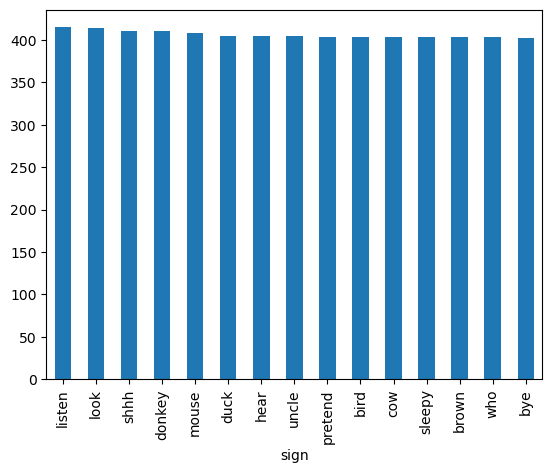

In [21]:
train['sign'].value_counts().head(15).plot(kind='bar') 

participant_id
49445    4968
61333    4900
36257    4896
16069    4848
26734    4841
55372    4826
2044     4810
37779    4782
32319    4753
29302    4722
22343    4677
53618    4656
37055    4648
28656    4563
62590    4563
34503    4545
27610    4275
25571    3865
18796    3502
4718     3499
30680    3338
Name: count, dtype: int64

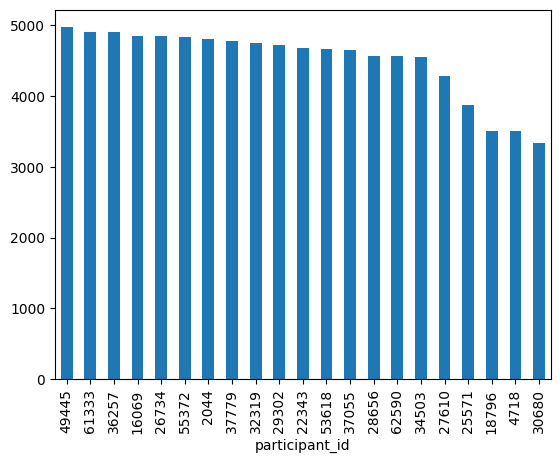

In [16]:
train['participant_id'].value_counts().plot(kind='bar')

participant_contributions = train['participant_id'].value_counts()
participant_contributions

In [37]:
# All signs in this data or labels
actions = np.array(list(label_map.keys()))
print(f'Number of unique signs: {len(actions)}')
actions

Number of unique signs: 250


array(['TV', 'after', 'airplane', 'all', 'alligator', 'animal', 'another',
       'any', 'apple', 'arm', 'aunt', 'awake', 'backyard', 'bad',
       'balloon', 'bath', 'because', 'bed', 'bedroom', 'bee', 'before',
       'beside', 'better', 'bird', 'black', 'blow', 'blue', 'boat',
       'book', 'boy', 'brother', 'brown', 'bug', 'bye', 'callonphone',
       'can', 'car', 'carrot', 'cat', 'cereal', 'chair', 'cheek', 'child',
       'chin', 'chocolate', 'clean', 'close', 'closet', 'cloud', 'clown',
       'cow', 'cowboy', 'cry', 'cut', 'cute', 'dad', 'dance', 'dirty',
       'dog', 'doll', 'donkey', 'down', 'drawer', 'drink', 'drop', 'dry',
       'dryer', 'duck', 'ear', 'elephant', 'empty', 'every', 'eye',
       'face', 'fall', 'farm', 'fast', 'feet', 'find', 'fine', 'finger',
       'finish', 'fireman', 'first', 'fish', 'flag', 'flower', 'food',
       'for', 'frenchfries', 'frog', 'garbage', 'gift', 'giraffe', 'girl',
       'give', 'glasswindow', 'go', 'goose', 'grandma', 'grandpa',


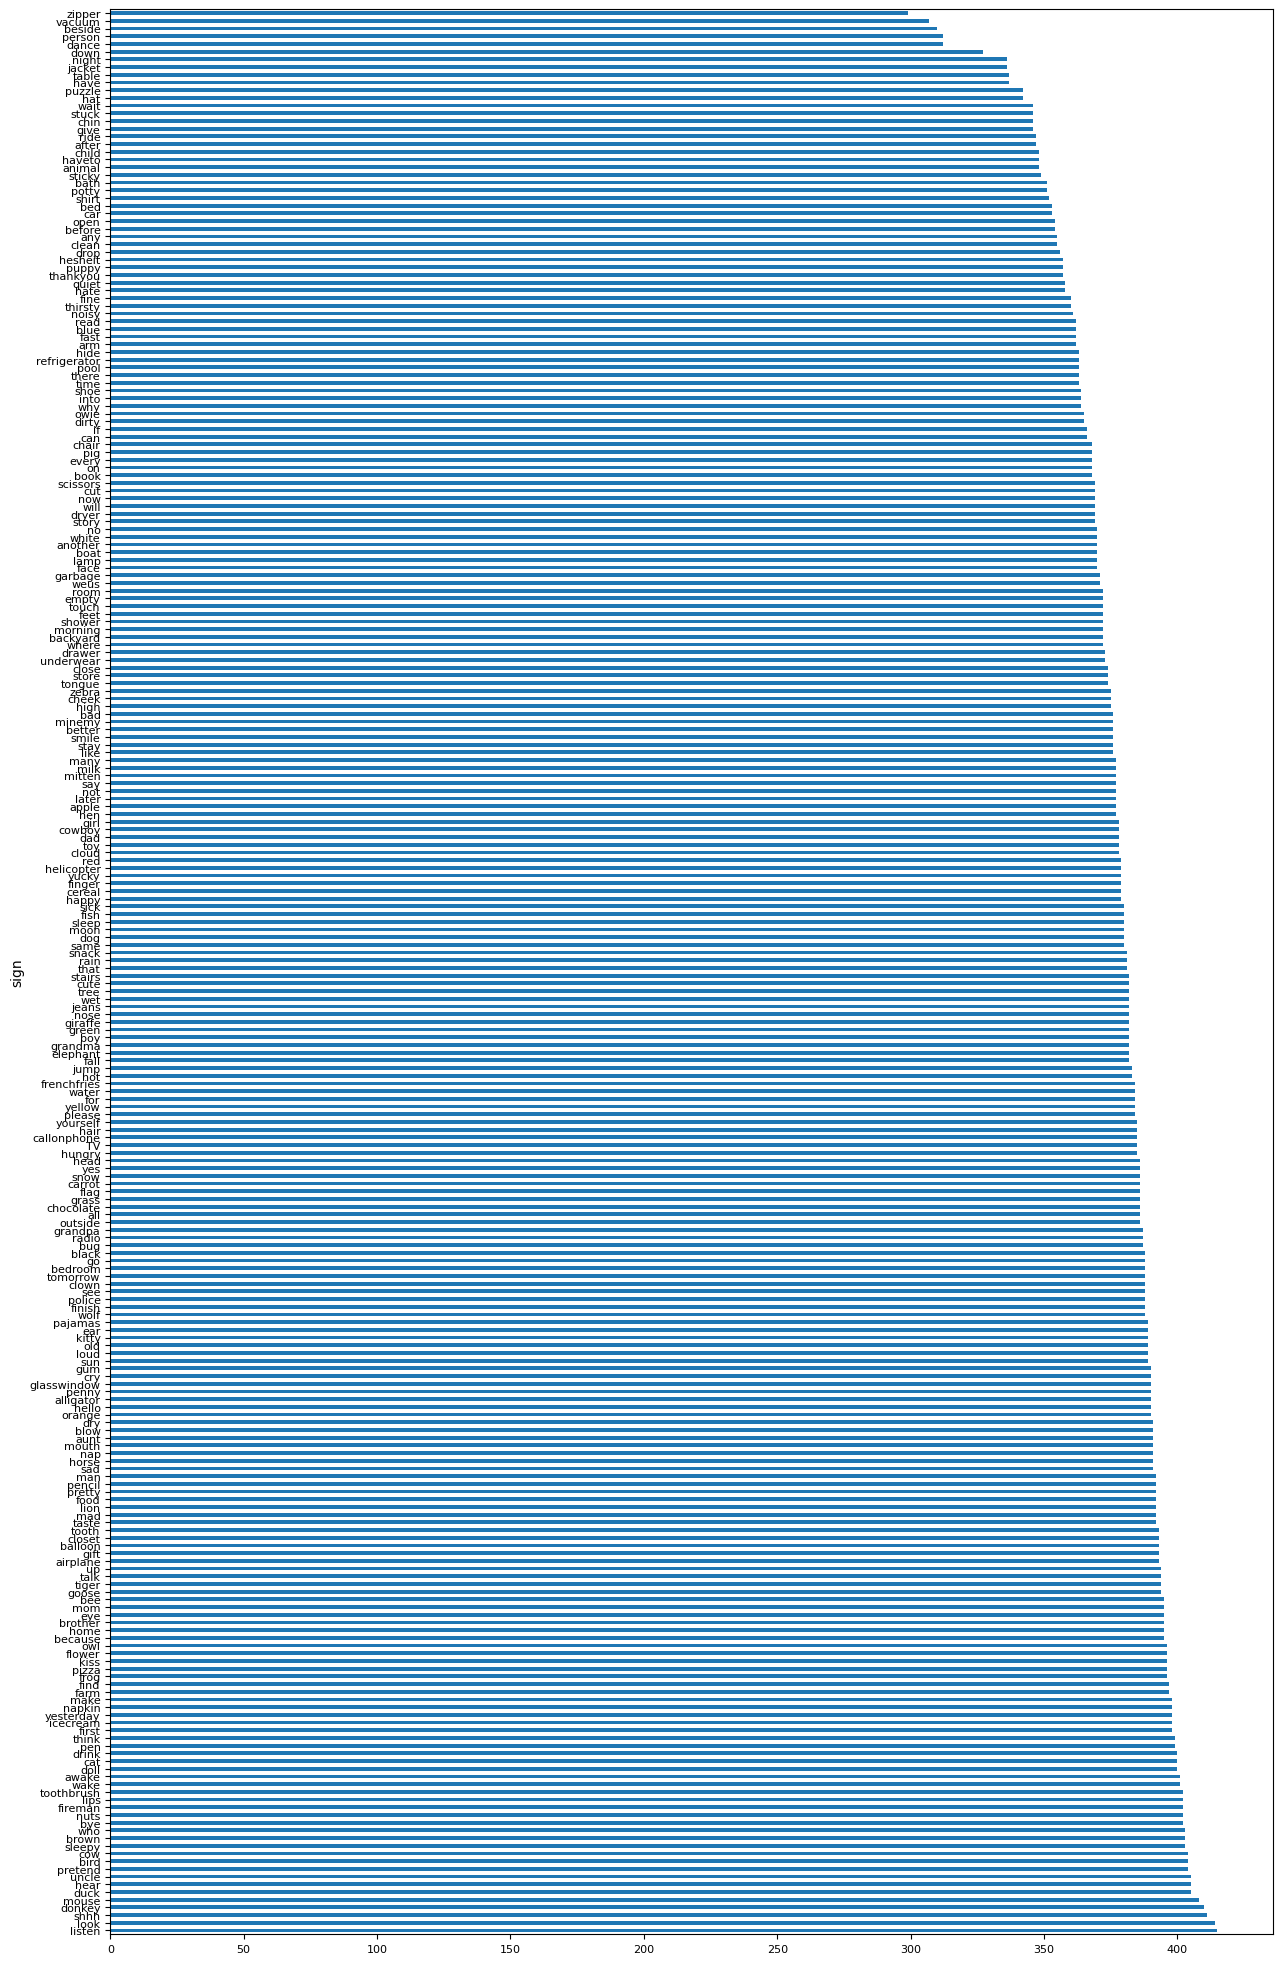

In [33]:
plt.figure(figsize=(15, 25))
train['sign'].value_counts().plot(kind='barh')
plt.tick_params(labelsize=8)


In [28]:
parquet

,frame,row_id,type,landmark_index,x,y,z
0,13,13-face-0,face,0,0.427638,0.411411,-0.047832
1,13,13-face-1,face,1,0.409782,0.372960,-0.066225
2,13,13-face-2,face,2,0.416043,0.386840,-0.038956
3,13,13-face-3,face,3,0.393718,0.345505,-0.040109
4,13,13-face-4,face,4,0.406930,0.362719,-0.068527
...,...,...,...,...,...,...,...
10312,31,31-right_hand-16,right_hand,16,NaN,NaN,NaN
10313,31,31-right_hand-17,right_hand,17,NaN,NaN,NaN
10314,31,31-right_hand-18,right_hand,18,NaN,NaN,NaN
10315,31,31-right_hand-19,right_hand,19,NaN,NaN,NaN


Every frame has:
 - 0 - 467 face ids
 - 468 - 488 left_hand ids
 - 489 - 521 pose ids
 - 522 - 542 right_hand ids

In [10]:
parquet['frame'].value_counts()

frame
8      543
112    543
114    543
115    543
116    543
      ... 
64     543
65     543
66     543
67     543
173    543
Name: count, Length: 166, dtype: int64

<Axes: xlabel='type', ylabel='count'>

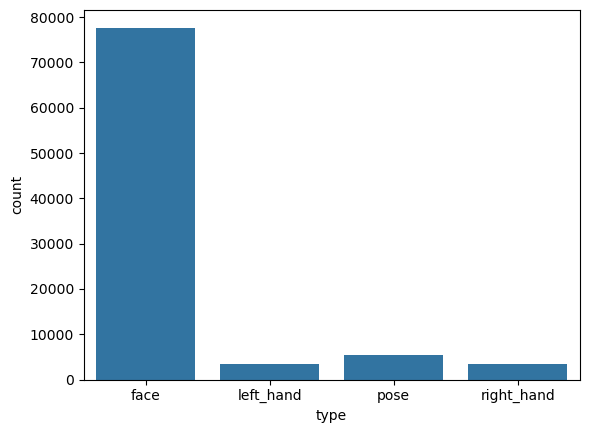

In [11]:
sns.countplot(x=parquet['type'])

There are 343 rows per frame in each video

In [12]:
parquet.isna().sum()

frame                0
row_id               0
type                 0
landmark_index       0
x                 5103
y                 5103
z                 5103
dtype: int64

In [13]:
parquet.describe()

,frame,landmark_index,x,y,z
count,90138.000000,90138.000000,85035.000000,85035.000000,85035.000000
mean,90.500000,202.994475,0.535193,0.363893,-0.026467
std,47.919469,146.791033,0.105514,0.217871,0.225320
min,8.000000,0.000000,-0.086707,0.089193,-2.378089
25%,49.000000,60.000000,0.487721,0.288504,-0.028082
50%,90.500000,196.000000,0.530850,0.325555,-0.004631
75%,132.000000,332.000000,0.579957,0.373406,0.016675
max,173.000000,467.000000,1.281831,2.120261,1.947490


In [14]:
parquet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90138 entries, 0 to 90137
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   frame           90138 non-null  int16  
 1   row_id          90138 non-null  object 
 2   type            90138 non-null  object 
 3   landmark_index  90138 non-null  int16  
 4   x               85035 non-null  float64
 5   y               85035 non-null  float64
 6   z               85035 non-null  float64
dtypes: float64(3), int16(2), object(2)
memory usage: 3.8+ MB
